The assumption in z-score removal method is that the column is normally distributed

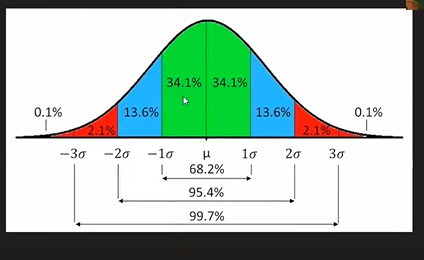

If the data is outside mean+/- 3*sigma, then we can consider them to be outliers. This works for most scenarios

Outliers treatment:
1) Trimming: Just remove them
2) Capping: We just make the values in a range, that is make them the lower bound value or the upper bound value